In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('./input/crash.csv', low_memory=False)
data.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [104]:
data.isnull().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                40
Crash Type                           0
Bus Involvement                     22
Heavy Rigid Truck Involvement    20515
Articulated Truck Involvement       22
Speed Limit                        702
Road User                            0
Gender                              27
Age                                  0
National Remoteness Areas        45965
SA4 Name 2016                    45951
National LGA Name 2017           45950
National Road Type               45966
Christmas Period                     0
Easter Period                        0
Age Group                           90
Day of week                          0
Time of day                          0
dtype: int64

In [105]:
data.drop(['Heavy Rigid Truck Involvement', 'National Remoteness Areas', 'SA4 Name 2016', 'National LGA Name 2017', 'National Road Type'], axis=1, inplace=True)

In [106]:
data.isnull().sum()

Crash ID                           0
State                              0
Month                              0
Year                               0
Dayweek                            0
Time                              40
Crash Type                         0
Bus Involvement                   22
Articulated Truck Involvement     22
Speed Limit                      702
Road User                          0
Gender                            27
Age                                0
Christmas Period                   0
Easter Period                      0
Age Group                         90
Day of week                        0
Time of day                        0
dtype: int64

In [107]:
data['Time'].mode()[0]

'15:00'

In [108]:
data['Time'].fillna(data['Time'].mode()[0], inplace=True)

In [109]:
data['Time'].isnull().sum()

0

In [110]:
data.isnull().sum()

Crash ID                           0
State                              0
Month                              0
Year                               0
Dayweek                            0
Time                               0
Crash Type                         0
Bus Involvement                   22
Articulated Truck Involvement     22
Speed Limit                      702
Road User                          0
Gender                            27
Age                                0
Christmas Period                   0
Easter Period                      0
Age Group                         90
Day of week                        0
Time of day                        0
dtype: int64

In [111]:
data['Bus Involvement'].fillna('Yes', inplace=True)

In [112]:
data.isnull().sum()

Crash ID                           0
State                              0
Month                              0
Year                               0
Dayweek                            0
Time                               0
Crash Type                         0
Bus Involvement                    0
Articulated Truck Involvement     22
Speed Limit                      702
Road User                          0
Gender                            27
Age                                0
Christmas Period                   0
Easter Period                      0
Age Group                         90
Day of week                        0
Time of day                        0
dtype: int64

In [113]:
data['Articulated Truck Involvement'].fillna('Yes', inplace=True)
data['Articulated Truck Involvement'].value_counts()

No     47476
Yes     5367
Name: Articulated Truck Involvement, dtype: int64

In [114]:
data.isnull().sum()

Crash ID                           0
State                              0
Month                              0
Year                               0
Dayweek                            0
Time                               0
Crash Type                         0
Bus Involvement                    0
Articulated Truck Involvement      0
Speed Limit                      702
Road User                          0
Gender                            27
Age                                0
Christmas Period                   0
Easter Period                      0
Age Group                         90
Day of week                        0
Time of day                        0
dtype: int64

<AxesSubplot:>

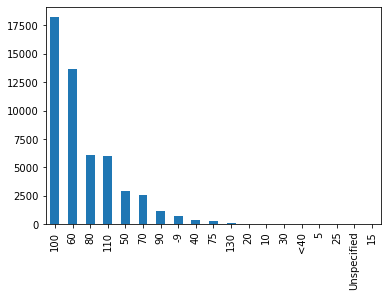

In [115]:
data['Speed Limit'].value_counts().plot(kind='bar')

In [121]:
data['Speed Limit'].fillna(data['Speed Limit'].mode()[0], inplace=True)

In [122]:
data['Speed Limit'].isnull().sum()

0

In [123]:
data.loc[['-9', '<40', 'Unspecified'], data['Speed Limit']] = data['Speed Limit'].mode()[0]

In [124]:
data['Speed Limit'].value_counts()

100            18950
60             13686
80              6119
110             6038
50              2903
70              2538
90              1137
-9               684
40               346
75               254
130              116
20                27
10                18
30                14
<40                5
5                  3
25                 2
Unspecified        2
15                 1
Name: Speed Limit, dtype: int64